# 課題２（プログラムによる引張試験結果の整理）について
 
①　PYTHONによるプログラム作成および実行が可能なプラットフォームを準備する。

②　“PYTHON_practice_ver2.xlsx”の中身を確認する。
　　　引張試験結果（試験前後の形状、引張荷重、伸び（引張方向）、縮み（円周方向）のデータ列）
 
③　PYTHONを用いて“PYTHON_practice_ver2.xlsx”を読み込み、公称ひずみ、公称応力、対数ひずみ、実応力を計算する。ただし、対数ひずみと実応力は一様変形が開始したところから最大荷重点の一つ前までのデータとして求める。
 
④　PYTHONを用いて、ヤング率、ポアソン比、塑性係数、加工硬化、引張強さ、破断伸び（全伸び）、絞りを計算により求める。
 
⑤　求めた結果についてPYTHONを用いてcsvファイルとして出力する。
 
⑥　Excelでcsvファイルを読み込んで公称応力―公称ひずみ線図、実応力－対数ひずみ線図を一つのグラフとして作成する。

<h2>データ整理</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語の表示
%matplotlib inline
data = pd.read_excel('practice.xlsx',header=None)

In [2]:
df1 = data.iloc[0:6,0:5].fillna('-')
df2 = data.iloc[8:,0:4].reset_index(drop=True)
df2.rename(columns={0:"No.",1:"Weight (kN)",2:"Stretch (mm)",3:"Shrink (mm)"},inplace=True)

In [3]:
df1.head(6)

,0,1,2,3,4
0,形状,試験前,-,試験後,-
1,-,標点間距離,外径,標点間距離,外径
2,-,mm,mm,mm,mm
3,-,50.05,14,70.3,8.9
4,-,50.2,14,70.7,8.8
5,-,50.15,14,70.4,8.95


In [4]:
df2.head(10) #最初の10つを確認

,No.,Weight (kN),Stretch (mm),Shrink (mm)
0,No.,荷重,伸び（引張方向）,縮み（垂直方向）
1,－,KN,mm,mm
2,1,2,0,0
3,2,4,0.0043,-0.0012
4,3,5.9,0.0066,-0.0018
5,4,7.9,0.0096,-0.0025
6,5,9.8,0.0133,-0.0035
7,6,11.8,0.0163,-0.0042
8,7,13.8,0.0196,-0.0049
9,8,15.7,0.0226,-0.0058


In [5]:
# 試験片のデータ
shikenhen = df1.iloc[3:,1:].astype(float).reset_index(drop=True)
shikenhen.rename(columns={1:"Distance before (mm)",2:"Diameter before (mm)",3:"Distance after (mm)",4:"Diameter after (mm)"},inplace=True)
shikenhen

,Distance before (mm),Diameter before (mm),Distance after (mm),Diameter after (mm)
0,50.05,14.0,70.3,8.90
1,50.20,14.0,70.7,8.80
2,50.15,14.0,70.4,8.95


In [6]:
# jiku = hippari[]

In [7]:
# 引張り試験のデータ
hippari = df2[["No.","Weight (kN)","Stretch (mm)","Shrink (mm)"]].fillna(0).iloc[2:].astype(float).reset_index(drop=True)
print(hippari)

     No.  Weight (kN)  Stretch (mm)  Shrink (mm)
0    1.0          2.0        0.0000       0.0000
1    2.0          4.0        0.0043      -0.0012
2    3.0          5.9        0.0066      -0.0018
3    4.0          7.9        0.0096      -0.0025
4    5.0          9.8        0.0133      -0.0035
5    6.0         11.8        0.0163      -0.0042
6    7.0         13.8        0.0196      -0.0049
7    8.0         15.7        0.0226      -0.0058
8    9.0         17.7        0.0256      -0.0065
9   10.0         19.6        0.0291      -0.0074
10  11.0         21.6        0.0324      -0.0082
11  12.0         23.6        0.0351      -0.0090
12  13.0         25.5        0.0382      -0.0097
13  14.0         27.5        0.0412      -0.0104
14  15.0         29.4        0.0447      -0.0112
15  16.0         33.4        0.0502      -0.0128
16  17.0         37.3        0.0572      -0.0143
17  18.0         41.2        0.0647      -0.0158
18  19.0         45.1        0.0697      -0.0173
19  20.0         43.

In [8]:
# hippari.info()
# hippari.describe()

## 求める材料定数
- ヤング率 E [GPa] = 〇
- ポアソン比　ν = 〇
- 引張強さ σ_max [MPa] = 〇
- 上降伏応力 [MPa] =　〇
- 下降伏応力 [MPa] =　〇
- 全伸び　δ = 〇
- 絞り φ　= 〇
- 塑性係数 F [MPa] = 〇
- 加工硬化指数 n = 〇

In [9]:
avg_distance_before = shikenhen["Distance before (mm)"].mean()
print(f'試験前の標点間距離の平均は {avg_distance_before.round(4)} mm')
avg_distance_after = shikenhen["Distance after (mm)"].mean()
print(f'試験後の標点間距離の平均は {avg_distance_after.round(4)} mm')

試験前の標点間距離の平均は 50.1333 mm
試験後の標点間距離の平均は 70.4667 mm


In [10]:
avg_diameter_before = shikenhen["Diameter before (mm)"].mean(axis=0)
print(f'試験前の外径の平均は {avg_diameter_before.round(4)} mm')
area_before = (np.pi*(avg_diameter_before/2)**2).round(4)
print(f'試験前の断面積は {area_before} mm^2')

試験前の外径の平均は 14.0 mm
試験前の断面積は 153.938 mm^2


In [11]:
avg_diameter_after = shikenhen["Diameter after (mm)"].mean(axis=0)
print(f'試験前後外径の平均は {avg_diameter_after.round(4)} mm')
area_after = (np.pi*(avg_diameter_after/2)**2).round(4)
print(f'試験後の断面積は {area_after} mm^2')

試験前後外径の平均は 8.8833 mm
試験後の断面積は 61.9786 mm^2


In [12]:
P_max = hippari["Weight (kN)"].max().round(2) #最大荷重
print(f'最大荷重は {P_max} kN')

最大荷重は 68.2 kN


In [13]:
sigma_max = P_max*10**3/area_before
print(f'引張強さ σ_max は {sigma_max.round(4)} MPa')

引張強さ σ_max は 443.0355 MPa


In [14]:
zennobi = (avg_distance_after-avg_distance_before)/avg_distance_before
print(f'全伸び δ は {zennobi.round(4)}')

全伸び δ は 0.4056


In [15]:
# 絞り
shibori = (area_before-area_after)/area_before
print(f'絞り φ は {shibori.round(4)}')

絞り φ は 0.5974


In [16]:
# 公称応力、公称ひずみ、対数ひずみ、実応力を計算する
hippari["Nominal Stress (MPa)"] = (hippari["Weight (kN)"]*1000/area_before).round(1) #公称応力
hippari["Nominal Strain"] = hippari["Stretch (mm)"]*10**(-2) #公称ひずみ(軸方向) με
hippari["Logarithmic Strain"] = np.log(1+hippari["Nominal Strain"]) #対数ひずみ
hippari["True Stress (MPa)"] = hippari["Nominal Stress (MPa)"]*(1+hippari["Nominal Strain"]) #実応力

# 一様変形が開始したところから最大荷重点の一つ前までのデータを求める
hippari2 = hippari.copy()
hippari2 = hippari2.iloc[19:33].reset_index(drop=True)
hippari2["Shrink (mm)"].replace(0, pd.NA,inplace=True)
hippari2.drop(columns=['Nominal Stress (MPa)','Nominal Strain'],inplace=True)

# csvファイルに出力
hippari.drop(columns=["Logarithmic Strain","True Stress (MPa)"],inplace=False).to_csv("hippari.csv",index=False,float_format='%g')
hippari2.to_csv("hippari2.csv",index=False,float_format='%g')

hippari["Nominal Strain 2"]= hippari["Shrink (mm)"]*10**(-2) #公称ひずみ(円周方向) με

In [17]:
jiku = hippari.iloc[:,[4,5]].iloc[:19,:]
print(jiku)

    Nominal Stress (MPa)  Nominal Strain
0                   13.0        0.000000
1                   26.0        0.000043
2                   38.3        0.000066
3                   51.3        0.000096
4                   63.7        0.000133
5                   76.7        0.000163
6                   89.6        0.000196
7                  102.0        0.000226
8                  115.0        0.000256
9                  127.3        0.000291
10                 140.3        0.000324
11                 153.3        0.000351
12                 165.7        0.000382
13                 178.6        0.000412
14                 191.0        0.000447
15                 217.0        0.000502
16                 242.3        0.000572
17                 267.6        0.000647
18                 293.0        0.000697


In [18]:
enshu = hippari.iloc[:19,[4,8]].abs()
print(enshu)

    Nominal Stress (MPa)  Nominal Strain 2
0                   13.0          0.000000
1                   26.0          0.000012
2                   38.3          0.000018
3                   51.3          0.000025
4                   63.7          0.000035
5                   76.7          0.000042
6                   89.6          0.000049
7                  102.0          0.000058
8                  115.0          0.000065
9                  127.3          0.000074
10                 140.3          0.000082
11                 153.3          0.000090
12                 165.7          0.000097
13                 178.6          0.000104
14                 191.0          0.000112
15                 217.0          0.000128
16                 242.3          0.000143
17                 267.6          0.000158
18                 293.0          0.000173


In [19]:
df3 = [jiku,enshu]
jiku_enshuu = pd.concat(df3,axis=1)
jiku_enshuu.rename(columns={"Nominal Stress (MPa)":"公称応力 (軸方向)","Nominal Strain":"公称ひずみ (軸方向)","Nominal Stress (MPa)":"公称応力 (円周方向)","Nominal Strain 2":"公称ひずみ (円周方向)"},inplace=True)
jiku_enshuu.to_csv("hippari3.csv",index=False,float_format='%g')
jiku_enshuu

,公称応力 (円周方向),公称ひずみ (軸方向),公称応力 (円周方向),公称ひずみ (円周方向)
0,13.0,0.000000,13.0,0.000000
1,26.0,0.000043,26.0,0.000012
2,38.3,0.000066,38.3,0.000018
3,51.3,0.000096,51.3,0.000025
4,63.7,0.000133,63.7,0.000035
...,...,...,...,...
14,191.0,0.000447,191.0,0.000112
15,217.0,0.000502,217.0,0.000128
16,242.3,0.000572,242.3,0.000143
17,267.6,0.000647,267.6,0.000158


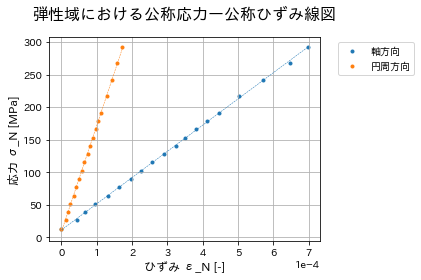

In [32]:
plt.title('弾性域における公称応力ー公称ひずみ線図',fontsize=16,pad=18)

#obtain m (slope) and b(intercept) of linear regression line (最小二乗法)
m, b = np.polyfit(jiku["Nominal Strain"], jiku["Nominal Stress (MPa)"], 1)
plt.plot(jiku["Nominal Strain"], m*jiku["Nominal Strain"]+b,"--",linewidth=0.5)
plt.scatter(jiku["Nominal Strain"],jiku["Nominal Stress (MPa)"],label = "軸方向",marker= ".")

m2, b2 = np.polyfit(enshu["Nominal Strain 2"], enshu["Nominal Stress (MPa)"], 1)
plt.plot(enshu["Nominal Strain 2"], m2*enshu["Nominal Strain 2"]+b2,"--",linewidth=0.5)
plt.scatter(enshu["Nominal Strain 2"],enshu["Nominal Stress (MPa)"],label = "円周方向",marker= ".")

plt.xlabel('ひずみ ε_N [-]', fontsize=12)
plt.ylabel('応力 σ_N [MPa]', fontsize=12)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
print(f'(軸方向)   傾き = {int(m.round(0))} MPa, 切片 = {b.round(2)} MPa')
print(f'(円周方向)  傾き = {int(m2.round(0))} MPa, 切片 = {b2.round(2)} MPa')
print(f'ヤング率　E = {int(m.round(0))*10**(-3)} GPa')
print(f'ポアソン比　ν = {(m/m2).round(3)}')

(軸方向)   傾き = 402793 MPa, 切片 = 11.26 MPa
(円周方向)  傾き = 1632022 MPa, 切片 = 8.46 MPa
ヤング率　E = 402.793 GPa
ポアソン比　ν = 0.247


In [22]:
print(hippari)

     No.  Weight (kN)  Stretch (mm)  Shrink (mm)  Nominal Stress (MPa)  \
0    1.0          2.0        0.0000       0.0000                  13.0   
1    2.0          4.0        0.0043      -0.0012                  26.0   
2    3.0          5.9        0.0066      -0.0018                  38.3   
3    4.0          7.9        0.0096      -0.0025                  51.3   
4    5.0          9.8        0.0133      -0.0035                  63.7   
5    6.0         11.8        0.0163      -0.0042                  76.7   
6    7.0         13.8        0.0196      -0.0049                  89.6   
7    8.0         15.7        0.0226      -0.0058                 102.0   
8    9.0         17.7        0.0256      -0.0065                 115.0   
9   10.0         19.6        0.0291      -0.0074                 127.3   
10  11.0         21.6        0.0324      -0.0082                 140.3   
11  12.0         23.6        0.0351      -0.0090                 153.3   
12  13.0         25.5        0.0382   

In [23]:
print(f'最大荷重は {P_max} kN\n')

print(hippari2)

最大荷重は 68.2 kN

     No.  Weight (kN)  Stretch (mm) Shrink (mm)  Logarithmic Strain  \
0   20.0         43.8        1.5697        <NA>            0.015575   
1   21.0         50.0        2.0697        <NA>            0.020486   
2   22.0         52.2        2.5697        <NA>            0.025372   
3   23.0         54.5        3.0697        <NA>            0.030235   
4   24.0         56.5        3.5697        <NA>            0.035075   
5   25.0         59.6        4.5697        <NA>            0.044684   
6   26.0         62.3        5.5697        <NA>            0.054201   
7   27.0         63.8        6.5697        <NA>            0.063629   
8   28.0         65.3        7.5697        <NA>            0.072969   
9   29.0         66.2        8.5697        <NA>            0.082222   
10  30.0         67.1        9.5697        <NA>            0.091391   
11  31.0         67.7       10.5697        <NA>            0.100476   
12  32.0         68.0       11.5697        <NA>            0.1

In [24]:
print(f'上降伏応力 δ_upper は 293.0 MPa')
print(f'下降伏応力 δ_lower は 284.5 MPa')

上降伏応力 δ_upper は 293.0 MPa
下降伏応力 δ_lower は 284.5 MPa


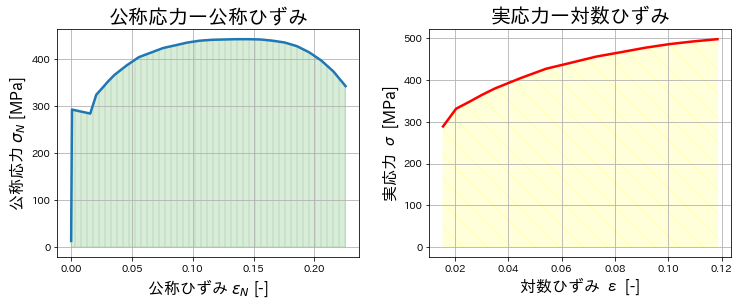

In [25]:
x1=hippari["Nominal Strain"] 
y1=hippari["Nominal Stress (MPa)"] 
x2=hippari2["Logarithmic Strain"]
y2=hippari2["True Stress (MPa)"]
plt.figure(figsize=(12,6))

# plot for engineering stress- engineering strain diagram
plt.subplot(1,2,1)
plt.plot(x1,y1,linewidth=2.5)
plt.fill_between(x1,y1,color='green',hatch='||',alpha=0.15)
plt.title("公称応力ー公称ひずみ",fontsize=20)
plt.xlabel(r'公称ひずみ $ε_N$ [-]', fontsize=16)
plt.ylabel(r'公称応力 $σ_N$ [MPa]', fontsize=16)
plt.grid()

# plot for true stress- logarithmic strain diagram
plt.tight_layout(pad = 7.0)
plt.subplot(1,2,2)
plt.plot(x2,y2,'red',linewidth=2.5)
plt.fill_between(x2,y2,color='yellow',hatch='\\',alpha=0.15)
plt.title('実応力ー対数ひずみ',fontsize=20)
plt.xlabel('対数ひずみ ε [-]', fontsize=16)
plt.ylabel('実応力 σ [MPa]', fontsize=16)
plt.grid()
plt.savefig("stress-strain_diagram.jpg", dpi=300)
plt.show()

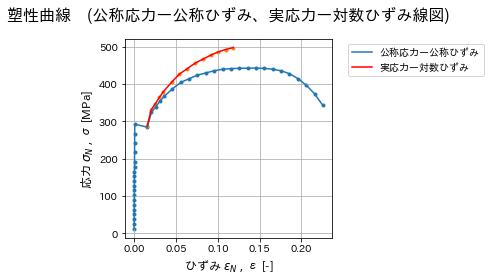

In [34]:
plt.title('塑性曲線　(公称応力ー公称ひずみ、実応力ー対数ひずみ線図)',fontsize=16,pad=18)
plt.scatter(x1,y1,marker = ".")
plt.plot(x1,y1,label = "公称応力ー公称ひずみ")
plt.scatter(x2,y2, marker = ".")
plt.plot(x2,y2,label = "実応力ー対数ひずみ",color= "red")

plt.xlabel(r'ひずみ $ε_N$ , ε [-]', fontsize=12)
plt.ylabel(r'応力 $σ_N$ , σ [MPa]', fontsize=12)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
hippari2

,No.,Weight (kN),Stretch (mm),Shrink (mm),Logarithmic Strain,True Stress (MPa)
0,20.0,43.8,1.5697,<NA>,0.015575,288.965797
1,21.0,50.0,2.0697,<NA>,0.020486,331.522386
2,22.0,52.2,2.5697,<NA>,0.025372,347.813853
3,23.0,54.5,3.0697,<NA>,0.030235,364.866738
4,24.0,56.5,3.5697,<NA>,0.035075,380.100799
...,...,...,...,...,...,...
9,29.0,66.2,8.5697,<NA>,0.082222,466.849710
10,30.0,67.1,9.5697,<NA>,0.091391,477.614322
11,31.0,67.7,10.5697,<NA>,0.100476,486.285541
12,32.0,68.0,11.5697,<NA>,0.109479,492.803365


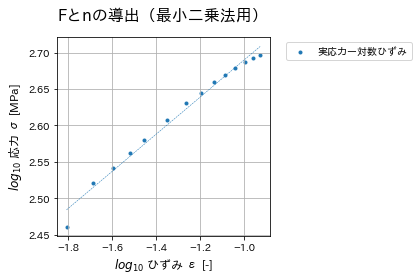


傾き = 0.255 , 切片 = 2.945

log10 F = 2.945,  ∴ F = 881 MPa

∴ n = 0.255


In [28]:
plt.title('Fとnの導出（最小二乗法用）',fontsize=16,pad=18)

#obtain m (slope) and b(intercept) of linear regression line
m3, b3 = np.polyfit(np.log10(hippari2["Logarithmic Strain"]), np.log10(hippari2["True Stress (MPa)"]), 1)
plt.plot(np.log10(hippari2["Logarithmic Strain"]), m3*np.log10(hippari2["Logarithmic Strain"])+b3,"--",linewidth =0.5)
plt.scatter(np.log10(hippari2["Logarithmic Strain"]),np.log10(hippari2["True Stress (MPa)"])
            ,label = "実応力ー対数ひずみ",marker = ".")
plt.xlabel(r'$log_{10}$ ひずみ ε [-]', fontsize=12)
plt.ylabel(r'$log_{10}$ 応力 σ [MPa]', fontsize=12)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

print(f'\n傾き = {m3.round(3)} , 切片 = {b3.round(3)}')
print(f'\nlog10 F = {b3.round(3)},  ∴ F = {int(10**(b3.round(3)))} MPa')
print(f'\n∴ n = {m3.round(3)}')

|   <!-- -->        |               <!-- -->                                          |
| ----------------- | ------------------------------------------------------------------ |
| ヤング率 E [GPa] | 402.793 |
| ポアソン比　ν | 0.247 |
| 引張強さ σ_max [MPa] | 443.036 |
| 上降伏応力 [MPa] | 293.0 |
| 下降伏応力 [MPa] | 284.5 |
| 全伸び　δ | 0.4056 |
| 絞り φ | 0.5974 |
| 塑性係数 F [MPa] | 881 |
| 加工硬化指数 n | 0.255 |


## 求める材料定数
- ヤング率 E [GPa] = 〇
- ポアソン比　ν = 〇
- 引張強さ σ_max [MPa] = 〇
- 上降伏応力 [MPa] =　〇
- 下降伏応力 [MPa] =　〇
- 全伸び　δ = 〇
- 絞り φ　= 〇
- 塑性係数 F [MPa] = 〇
- 加工硬化指数 n = 〇

# Compiled codes

In [29]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import japanize_matplotlib  # 日本語の表示

# data = pd.read_excel(r'C:\Users\User\Desktop\practice.xlsx', header=None)
# df1 = data.iloc[0:6, 0:5].fillna('-')
# df2 = data.iloc[8:, 0:4].reset_index(drop=True)
# df2.rename(columns={0: "no", 1: "weight_kN",
#            2: "stretch_mm", 3: "shrink_mm"}, inplace=True)

# # 試験片のデータ
# shikenhen = df1.iloc[3:, 1:].astype(float).reset_index(drop=True)
# shikenhen.rename(columns={1: "distance_bef", 2: "diameter_bef",
#                  3: "distance_aft", 4: "diameter_aft"}, inplace=True)
# # 引張り試験のデータ
# hippari = df2[["weight_kN", "stretch_mm", "shrink_mm"]].fillna(
#     0).iloc[2:].astype(float).reset_index(drop=True)
# # print(hippari)

# avg_distance_before = shikenhen["distance_bef"].mean()
# print(f'試験前の標点間距離の平均は {avg_distance_before.round(4)} mm')
# avg_distance_after = shikenhen["distance_aft"].mean()
# print(f'試験後の標点間距離の平均は {avg_distance_after.round(4)} mm')
# avg_diameter_before = shikenhen["diameter_bef"].mean(axis=0)
# print(f'試験前の外径の平均は {avg_diameter_before.round(4)} mm')
# area_before = (np.pi*(avg_diameter_before/2)**2).round(4)
# print(f'試験前の断面積は {area_before} mm^2')
# avg_diameter_after = shikenhen["diameter_aft"].mean(axis=0)
# print(f'試験前後外径の平均は {avg_diameter_after.round(4)} mm')
# area_after = (np.pi*(avg_diameter_after/2)**2).round(4)
# print(f'試験後の断面積は {area_after} mm^2')
# # 最大荷重
# P_max = hippari["weight_kN"].max().round(2)
# print(f'最大荷重は {P_max} kN')
# # 引張強さ
# sigma_max = P_max*10**3/area_before
# print(f'引張強さ σ_max は {sigma_max.round(4)} MPa')
# # 全伸び
# zennobi = (avg_distance_after-avg_distance_before)/avg_distance_before
# print(f'全伸び δ は {zennobi.round(4)}')
# # 絞り
# shibori = (area_before-area_after)/area_before
# print(f'絞り φ は {shibori.round(4)}\n')

# # 公称応力、公称ひずみ、対数ひずみ、実応力を計算する
# hippari["nominal_stress_MPa"] = (hippari["weight_kN"]*1000/area_before).round(1) #公称応力
# hippari["nominal_strain"] = hippari["stretch_mm"]*10**(-6) #公称ひずみ
# hippari["log_strain"] = np.log(1+hippari["nominal_strain"]) #対数ひずみ
# hippari["true_stress_MPa"] = hippari["nominal_stress_MPa"]*(1+hippari["nominal_strain"]) #実応力

# # 一様変形が開始したところから最大荷重点の一つ前までのデータを求める
# hippari2 = hippari.copy()
# hippari2 = hippari2.iloc[19:33].reset_index(drop=True)
# hippari2["shrink_mm"].replace(0, pd.NA,inplace=True)
# hippari2.drop(columns=['nominal_stress_MPa','nominal_strain'],inplace=True)

# # csvファイルに出力
# hippari.to_csv("hippari.csv",index=False,float_format='%g')
# hippari2.to_csv("hippari2.csv",index=False,float_format='%g')

# # stress-strain diagram
# x1=hippari["nominal_strain"] #  x軸
# y1=hippari["nominal_stress_MPa"] # y軸
# x2=hippari2["log_strain"]
# y2=hippari2["true_stress_MPa"]

# plt.grid(True,alpha=0.3)
# plt.plot(x1,y1,'g',label="公称ひずみー降伏応力")
# plt.plot(x2,y2,'r',label="対数ひずみー実応力")
# plt.title("塑性曲線(公称応力ー公称ひずみ、実応力ー対数ひずみ線図)",fontsize=20,pad=20)
# plt.xlabel('ひずみ ε [-]', fontsize=16)
# plt.ylabel('応力　σ [MPa]', fontsize=16)
# plt.legend()
# plt.show()

# print(f'\n図より上降伏応力 δ_upper は 293.0 MPa')
# print(f'図より下降伏応力 δ_lower は 284.5 MPa')